

*   MNIST
*   DataLoader, Transformation
*   Multilayer Neural Net, activation function
*   Loss and Optimizer
*   Training Loop (batch training)
*   Model Evaluation
*   GPU support







import packages

In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') 

hyperparameters

In [9]:
input_size = 784 # 28x28
hidden_size = 100
num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 0.001

MNIST

In [7]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

torch.Size([100, 1, 28, 28]) torch.Size([100])


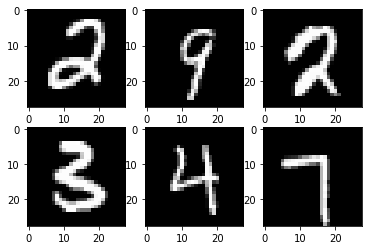

In [8]:
for i in range(6):
  plt.subplot(2, 3, i + 1)
  plt.imshow(samples[i][0], cmap='gray')
plt.show()

build neural network

In [11]:
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()

    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out

model = NeuralNet(input_size, hidden_size, num_classes)


Setting loss and optimizer

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

Train Loop

In [14]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    # 100, 1, 28, 28
    # 100, 784
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    # forward
    outputs = model(images)
    loss = criterion(outputs, labels)


    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() 

    if (i + 1) % 100 == 0:
      print(f'epoch {epoch + 1} / {num_epochs}, step {i + 1}/  {n_total_steps}, loss={loss.item():.4f}')

epoch 1 / 10, step 100/  600, loss=0.4112
epoch 1 / 10, step 200/  600, loss=0.3714
epoch 1 / 10, step 300/  600, loss=0.3159
epoch 1 / 10, step 400/  600, loss=0.2197
epoch 1 / 10, step 500/  600, loss=0.2397
epoch 1 / 10, step 600/  600, loss=0.0951
epoch 2 / 10, step 100/  600, loss=0.1003
epoch 2 / 10, step 200/  600, loss=0.1937
epoch 2 / 10, step 300/  600, loss=0.1524
epoch 2 / 10, step 400/  600, loss=0.1643
epoch 2 / 10, step 500/  600, loss=0.2729
epoch 2 / 10, step 600/  600, loss=0.1328
epoch 3 / 10, step 100/  600, loss=0.1992
epoch 3 / 10, step 200/  600, loss=0.1660
epoch 3 / 10, step 300/  600, loss=0.0843
epoch 3 / 10, step 400/  600, loss=0.1349
epoch 3 / 10, step 500/  600, loss=0.0701
epoch 3 / 10, step 600/  600, loss=0.1308
epoch 4 / 10, step 100/  600, loss=0.1365
epoch 4 / 10, step 200/  600, loss=0.1649
epoch 4 / 10, step 300/  600, loss=0.1216
epoch 4 / 10, step 400/  600, loss=0.0746
epoch 4 / 10, step 500/  600, loss=0.1745
epoch 4 / 10, step 600/  600, loss

Test Loop

In [18]:
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    outputs = model(images)

    # value, index
    _, predictions = torch.max(outputs, 1)
    n_samples += labels.shape[0]
    n_correct += (predictions == labels).sum().item()

  acc = 100.0 * n_correct / n_samples
  print(f"accuracy = {acc}")

accuracy = 97.25
